In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_excel("smartprix_laptop.xlsx")

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

In [4]:
df.sample(5)

,productName,price,rating,specScore,features
844,HP 15s-fq5331TU Laptop (12th Gen Core i5/ 8GB/ 1TB SSD/ Win11 Home),"₹50,490",4.30,59.0,"['12th Gen Intel Core i5 1235U', '10 Cores (2P + 8E), 12 Threads', '8\u2009GB DDR4 RAM', '1\u2009TB SSD', 'Intel UHD Graphics', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']"
809,Dell Inspiron 5330 Laptop (Intel Core Ultra 7 155H/ 16GB/ 1TB SSD/ Win11),"₹96,099",4.30,59.0,"['Intel Core Ultra 7 Series 1 155H', '16 Cores (6P + 8E + 2LP-E), 22 Threads', '16\u2009GB LPDDR5x RAM', '1\u2009TB SSD', 'Intel Arc Graphics', '13.3\u2009inches, 2560\u2009x\u20091600\u2009pixels', 'Windows 11 OS', '1 Year Warranty']"
781,Acer ‎AL15G- 52 Gaming Laptop (12th Gen Core i5-12450H/ 16GB/ 1TB SSD/ Win11/ 6GB RTX 3050 Graphics),"₹65,990",4.00,65.0,"['12th Gen Intel Core i5 12450H', 'Octa Core (4P + 4E), 12 Threads', '16\u2009GB DDR4 RAM', '1\u2009TB SSD', '6\u2009GB NVIDIA GeForce RTX 3050', '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels', 'Windows 11 OS', '1 Year Warranty']"
664,Huawei MateBook GT 14 Laptop (Intel Core Ultra 9 185H/ 32GB/ 2TB SSD/ Win11),"₹1,27,990",4.35,69.0,"['Intel Core Ultra 9 Series 1 185H', '16 Cores (6P + 8E + 2LP-E), 22 Threads', '32\u2009GB RAM', '2\u2009TB SSD', 'Intel Arc Graphics', '14.2\u2009inches, 1920\u2009x\u20092880\u2009pixels, Touch Screen', 'Windows 11 OS', '1 Year Warranty']"
360,Lenovo Ideapad 5 ‎14AHP9 2-in-1 83DR003DIN Laptop (AMD Ryzen 5 8645HS/ 16GB/ 512GB SSD/ Win11 Home),"₹72,490",4.50,63.0,"['8th Gen AMD Ryzen 5 8645HS', 'Hexa Core, 12 Threads', '16\u2009GB LPDDR5X RAM', '512\u2009GB SSD', 'AMD Radeon', '14\u2009inches, 1920\u2009x\u20091200\u2009pixels, Touch Screen', 'Windows 11 OS', '1 Year Warranty']"


## Initial Cleaning

In [5]:
df['features'] = df['features'].str.replace("[","").str.replace("]","").str.replace("'","")

C:\Users\iampr\AppData\Local\Temp\ipykernel_4536\432715365.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['features'] = df['features'].str.replace("[","").str.replace("]","").str.replace("'","")


In [6]:
df['processor'] = df['features'].str.split(",").str[0]

In [7]:
df['core'] = df['features'].str.split(",").str[1]

In [8]:
df['threads'] = df['features'].str.split(",").str[2]

In [9]:
df['ram'] = df['features'].str.split(",").str[3]

In [10]:
df['storage'] = df['features'].str.split(",").str[4]

In [11]:
df['graphics_card'] = df['features'].str.split(",").str[5]

In [12]:
df['screen_size'] = df['features'].str.split(",").str[6]

In [13]:
df['pixels'] = df['features'].str.split(",").str[7]

In [14]:
df['os'] = df['features'].str.split(",").str[8]

In [15]:
df['warranty'] = df['features'].str.split(",").str[9]

In [16]:
df['brand'] = df['productName'].str.split(" ").str[0]

In [17]:
df.head()

,productName,price,rating,specScore,features,processor,core,threads,ram,storage,graphics_card,screen_size,pixels,os,warranty,brand
0,Asus Vivobook 16X K3605ZF-MBN545WS Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11/ 4GB RTX2050),"₹69,990",4.60,69.0,"12th Gen Intel Core i5 12500H, 12 Cores (4P + 8E), 16 Threads, 16\u2009GB DDR4 RAM, 512\u2009GB SSD, 4\u2009GB NVIDIA GeForce RTX 2050, 16\u2009inches, 1920\u2009x\u20091200\u2009pixels, Windows 11 OS, 1 Year Warranty",12th Gen Intel Core i5 12500H,12 Cores (4P + 8E),16 Threads,16\u2009GB DDR4 RAM,512\u2009GB SSD,4\u2009GB NVIDIA GeForce RTX 2050,16\u2009inches,1920\u2009x\u20091200\u2009pixels,Windows 11 OS,1 Year Warranty,Asus
1,Asus Vivobook 16X K3605ZC-MBN554WS Laptop (12th Gen Core i5/ 16GB/ 1TB SSD/ Win11/ 4GB RTX3050),"₹74,990",4.05,71.0,"12th Gen Intel Core i5 12500H, 12 Cores (4P + 8E), 16 Threads, 16\u2009GB DDR4 RAM, 1\u2009TB SSD, 4\u2009GB NVIDIA GeForce RTX 3050, 16\u2009inches, 1920\u2009x\u20091200\u2009pixels, Windows 11 OS, 1 Year Warranty",12th Gen Intel Core i5 12500H,12 Cores (4P + 8E),16 Threads,16\u2009GB DDR4 RAM,1\u2009TB SSD,4\u2009GB NVIDIA GeForce RTX 3050,16\u2009inches,1920\u2009x\u20091200\u2009pixels,Windows 11 OS,1 Year Warranty,Asus
2,Lenovo ThinkBook 15 G5 21JF002JIN Laptop (AMD Ryzen 3 7330U/ 8 GB/ 512 GB SSD/ Win11),"₹28,660",4.20,62.0,"7th Gen AMD Ryzen 3 7330U, Quad Core, 8 Threads, 8\u2009GB DDR4 RAM, 512\u2009GB SSD, AMD Radeon AMD, 15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels, Windows 11 OS, 1 Year Warranty",7th Gen AMD Ryzen 3 7330U,Quad Core,8 Threads,8\u2009GB DDR4 RAM,512\u2009GB SSD,AMD Radeon AMD,15.6\u2009inches,1920\u2009x\u20091080\u2009pixels,Windows 11 OS,1 Year Warranty,Lenovo
3,HP Victus 15-fa1351TX Gaming Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11 Home/ RTX 2050),"₹57,990",4.75,61.0,"12th Gen Intel Core i5 12450H, Octa Core (4P + 4E), 12 Threads, 16\u2009GB DDR4 RAM, 512\u2009GB SSD, 4\u2009GB NVIDIA GeForce RTX 2050, 15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels, Windows 11 OS, 1 Year Warranty",12th Gen Intel Core i5 12450H,Octa Core (4P + 4E),12 Threads,16\u2009GB DDR4 RAM,512\u2009GB SSD,4\u2009GB NVIDIA GeForce RTX 2050,15.6\u2009inches,1920\u2009x\u20091080\u2009pixels,Windows 11 OS,1 Year Warranty,HP
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / 8GB/ 512GB SSD/ Win11 Home),"₹24,990",4.05,54.0,"11th Gen Intel Core i3 1115G4, Dual Core, 4 Threads, 8\u2009GB DDR4 RAM, 512\u2009GB SSD, \u200eIntel Iris Xe Graphics, 14\u2009inches, 1920\u2009x\u20091080\u2009pixels, Windows 11 OS, 1 Year Warranty",11th Gen Intel Core i3 1115G4,Dual Core,4 Threads,8\u2009GB DDR4 RAM,512\u2009GB SSD,\u200eIntel Iris Xe Graphics,14\u2009inches,1920\u2009x\u20091080\u2009pixels,Windows 11 OS,1 Year Warranty,Acer


#### Exporting cleaned data to excel

In [18]:
df.to_excel("smartprix_laptop_cleaned_1.xlsx", index=False)

## Data Assesment

In [19]:
df = pd.read_excel("smartprix_laptop_cleaned_1.xlsx")

In [20]:
df.sample(7)

,productName,price,rating,specScore,features,processor,core,threads,ram,storage,graphics_card,screen_size,pixels,os,warranty,brand
764,Dell XPS 13 9315 Laptop (12th Gen Core i7/ 16GB/ 1TB SSD/ Win11),"₹1,66,790",4.50,57.0,"12th Gen Intel Core i7 1250U, 10 Cores (2P + 8E), 12 Threads, 16\u2009GB LPDDR5 RAM, 1\u2009TB SSD, Intel Iris Xe Graphics, 13.4\u2009inches, 1920\u2009x\u20091080\u2009pixels, Windows 11 OS, 1 Year Warranty",12th Gen Intel Core i7 1250U,10 Cores (2P + 8E),12 Threads,16\u2009GB LPDDR5 RAM,1\u2009TB SSD,Intel Iris Xe Graphics,13.4\u2009inches,1920\u2009x\u20091080\u2009pixels,Windows 11 OS,1 Year Warranty,Dell
629,Asus TUF Gaming F15 FX506HC-HN089WS Gaming Laptop (11th Gen Core i5/ 8GB/ 512GB SSD/ Win11/ 4GB Graph),"₹55,990",4.70,65.0,"11th Gen Intel Core i5 11400H, Hexa Core, 12 Threads, 8\u2009GB DDR4 RAM, 512\u2009GB SSD, 4\u2009GB NVIDIA GeForce RTX 3050, 15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels, Windows 11 OS, 1 Year Warranty",11th Gen Intel Core i5 11400H,Hexa Core,12 Threads,8\u2009GB DDR4 RAM,512\u2009GB SSD,4\u2009GB NVIDIA GeForce RTX 3050,15.6\u2009inches,1920\u2009x\u20091080\u2009pixels,Windows 11 OS,1 Year Warranty,Asus
512,Walker NU14A1 Laptop (Celeron N4020/ 4GB/ 128GB SSD / Win11 Home),"₹12,990",4.35,33.0,"Intel Celeron N4020, Dual Core, 2 Threads, 4\u2009GB DDR4 RAM, 128\u2009GB SSD, Intel Integrated UHD Graphics, 14.1\u2009inches, 1920\u2009x\u20091080\u2009pixels, Windows 11 OS, 1 Year Warranty",Intel Celeron N4020,Dual Core,2 Threads,4\u2009GB DDR4 RAM,128\u2009GB SSD,Intel Integrated UHD Graphics,14.1\u2009inches,1920\u2009x\u20091080\u2009pixels,Windows 11 OS,1 Year Warranty,Walker
126,Asus TUF Gaming F15 FX506HF-HN025W Gaming Laptop (11th Gen Core i5/ 16GB/ 512GB SSD/ Win11/ 4GB Graph),"₹53,854",4.60,66.0,"11th Gen Intel Core i5 11400H, Hexa Core, 12 Threads, 16\u2009GB DDR4 RAM, 512\u2009GB SSD, 4\u2009GB NVIDIA GeForce RTX 2050, 15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels, Windows 11 OS, 1 Year Warranty",11th Gen Intel Core i5 11400H,Hexa Core,12 Threads,16\u2009GB DDR4 RAM,512\u2009GB SSD,4\u2009GB NVIDIA GeForce RTX 2050,15.6\u2009inches,1920\u2009x\u20091080\u2009pixels,Windows 11 OS,1 Year Warranty,Asus
697,Dell XPS 13 9345 AI Laptops (Snapdragon X Elite X1E-80-100/ 16GB/ 512GB SSD/ Win11),"₹1,41,490",4.25,65.0,"Qualcomm Snapdragon X Elite X1E-80-100, 12 Cores, 16\u2009GB LPDDR5X RAM, 512\u2009GB SSD, Qualcomm Adreno GPU, 13.4\u2009inches, 1920\u2009x\u20091200\u2009pixels, Touch Screen, Windows 11 OS, 1 Year Warranty",Qualcomm Snapdragon X Elite X1E-80-100,12 Cores,16\u2009GB LPDDR5X RAM,512\u2009GB SSD,Qualcomm Adreno GPU,13.4\u2009inches,1920\u2009x\u20091200\u2009pixels,Touch Screen,Windows 11 OS,1 Year Warranty,Dell
421,Samsung Galaxy Book 3 Pro 14 ‎NP944XFG-KC1IN Laptop (13th Gen Core i7/ 16GB/ 512GB SSD/ Win11),"₹1,09,999",4.30,68.0,"13th Gen Intel Core i7 1360P, 12 Cores (4P + 8E), 16 Threads, 16\u2009GB LPDDR5 RAM, 512\u2009GB SSD, \u200eIntel Iris Xe Graphics, 14\u2009inches, 2880\u2009x\u20091800\u2009pixels, Windows 11 OS, 1 Year Warranty",13th Gen Intel Core i7 1360P,12 Cores (4P + 8E),16 Threads,16\u2009GB LPDDR5 RAM,512\u2009GB SSD,\u200eIntel Iris Xe Graphics,14\u2009inches,2880\u2009x\u20091800\u2009pixels,Windows 11 OS,1 Year Warranty,Samsung
305,Lenovo LOQ 15APH8 82XT004HIN 2023 Gaming Laptop (AMD Ryzen 7 7840HS/ 16GB/ 512GB SSD/ Win11/ 6GB Graph),"₹79,938",4.40,70.0,"7th Gen AMD Ryzen 7 7840HS, Octa Core, 16 Threads, 16\u2009GB DDR5 RAM, 512\u2009GB SSD, 6\u2009GB NVIDIA GeForce RTX 3050, 15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels, Windows 11 OS, 1 Year Warranty",7th Gen AMD Ryzen 7 7840HS,Octa Core,16 Threads,16\u2009GB DDR5 RAM,512\u2009GB SSD,6\u2009GB NVIDIA GeForce RTX 3050,15.6\u2009inches,1920\u2009x\u20091080\u2009pixels,Windows 11 OS,1 Year Warranty,Lenovo


In [21]:
df.shape

(1020, 16)

In [22]:
df.drop_duplicates(inplace=True)

#### Dropping duplicates reduced missing value count in the data

In [23]:
def missing_values_dataframe(df):
    """
    Create a DataFrame showing the number of missing values in each column of the input DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A DataFrame with two columns: 'Column' and 'Missing Values'.
                  'Column' lists the column names of the input DataFrame.
                  'Missing Values' shows the number of missing values in each column.
    """
    # Calculate the number of missing values for each column
    missing_counts = df.isna().sum()
    
    # Create a new DataFrame to display the results
    missing_values_df = pd.DataFrame({
        'Column': missing_counts.index,
        'Missing Values': missing_counts.values
    })
    
    return missing_values_df

In [24]:
missing_values_dataframe(df)

,Column,Missing Values
0,productName,0
1,price,0
2,rating,0
3,specScore,1
4,features,1
5,processor,1
6,core,1
7,threads,1
8,ram,1
9,storage,1


#### Issues with data (tag all dirty data to completness, validity, accuracy, inconsitency)


- Dirty Data
    1. price: change dtype to float --> accuracy
    2. threads: remove "Threads" & change dtype to int -->completness 
    3. warranty: remove "warranty" --> completness


- Messy Data
    1. processor: apply feature engineering
    2. core: apply feature engineering & fix as it contains other col data
    3. threads: fix as it contains other col data
    4. ram: apply feature engineering & fix as it contains other col data
    5. storage: apply feature engineering & fix as it contains other col data
    6. graphics_card: feature engineering & fix as it contains other col data
    7. screen_size: fix as it contains other col data
    8. os: fix as it contains other col data
    9. warranty: fix as it contains other col data
    
    
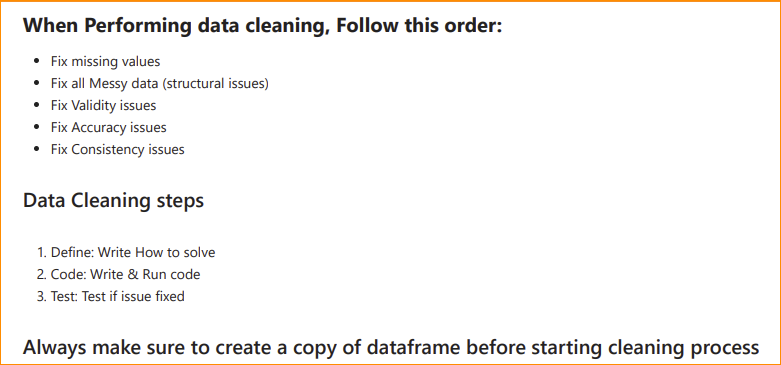    

## Round 1Data Cleaning

#### handling missing values

In [25]:
missing_df = df.copy()

In [26]:
missing_df.isnull().sum()

productName       0
price             0
rating            0
specScore         1
features          1
processor         1
core              1
threads           1
ram               1
storage           1
graphics_card     1
screen_size       3
pixels            3
os                3
warranty         51
brand             0
dtype: int64

In [27]:
import missingno as msno
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Missing Values Matrix')

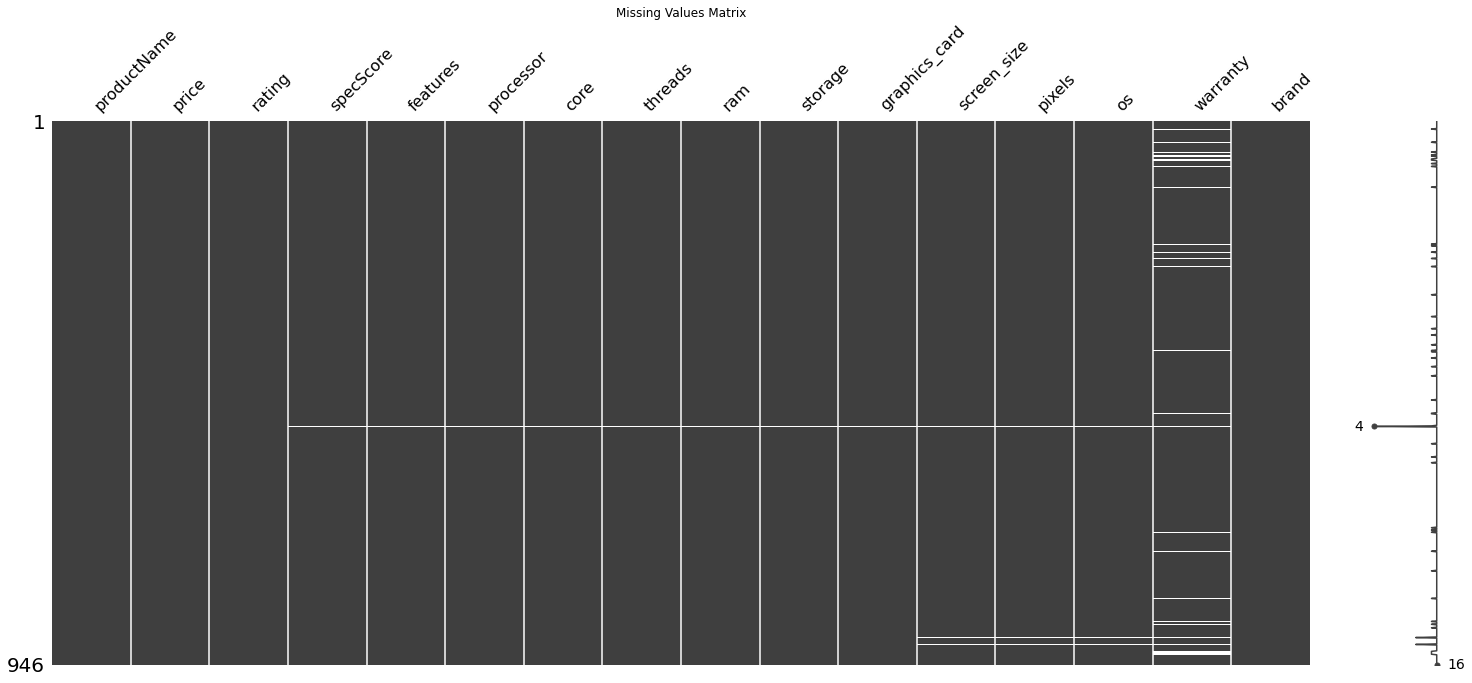

In [28]:
msno.matrix(missing_df)
plt.title('Missing Values Matrix')

In [29]:
#there is a pattern where all columns have missing values so we can remove those

In [30]:
missing_df[missing_df['specScore'].isnull()]

,productName,price,rating,specScore,features,processor,core,threads,ram,storage,graphics_card,screen_size,pixels,os,warranty,brand
578,Samsung Galaxy Book 3 Laptop (13th Gen Core i5/ 8GB/ 512GB SSD/ Win11),"₹69,990",4.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung


In [31]:
missing_df = missing_df.drop(578)

In [32]:
missing_df.isnull().sum()

productName       0
price             0
rating            0
specScore         0
features          0
processor         0
core              0
threads           0
ram               0
storage           0
graphics_card     0
screen_size       2
pixels            2
os                2
warranty         50
brand             0
dtype: int64

Text(0.5, 1.0, 'Missing Values Matrix')

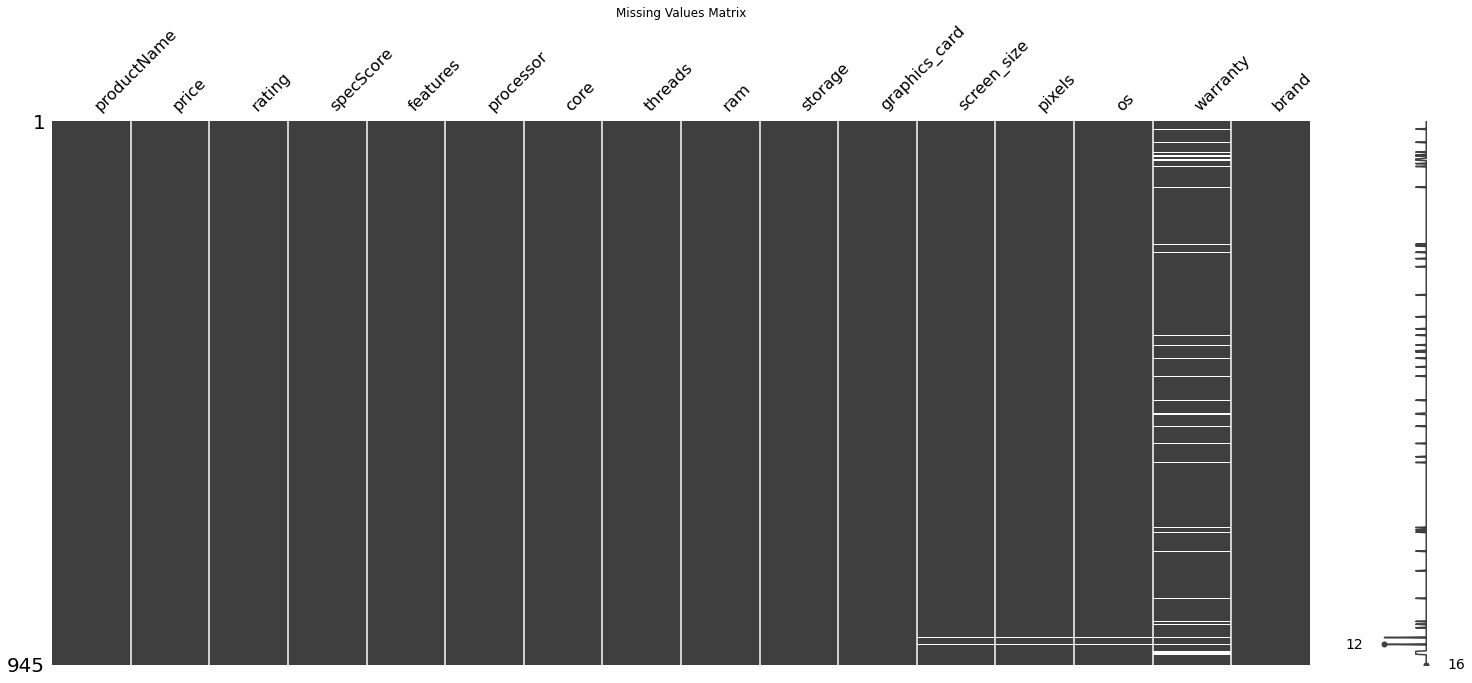

In [33]:
msno.matrix(missing_df)
plt.title('Missing Values Matrix')

In [34]:
missing_df[missing_df['screen_size'].isnull()]

,productName,price,rating,specScore,features,processor,core,threads,ram,storage,graphics_card,screen_size,pixels,os,warranty,brand
969,Huawei Qingyun L540 Laptop (Kirin 9006C/ 8 GB RAM/ 256 GB SSD/ Kirin OS),"₹70,499",4.30,23.0,"Kirin 9006C, 8\u2009GB RAM, 256\u2009GB SSD, 14\u2009inches, 2160\u2009x\u20091440\u2009pixels, Linux OS",Kirin 9006C,8\u2009GB RAM,256\u2009GB SSD,14\u2009inches,2160\u2009x\u20091440\u2009pixels,Linux OS,NaN,NaN,NaN,NaN,Huawei
982,Jio JioBook Cloud Laptop (Octa Core/ 4GB/ 64GB eMMC/ JioOS),"₹14,999",4.15,19.0,"Octa Core, 4\u2009GB \u200eLPDDR4 RAM, 64\u2009GB Hard Disk, 11.6\u2009inches, 1366\u2009x\u2009768\u2009pixels, 1 Year Warranty",Octa Core,4\u2009GB \u200eLPDDR4 RAM,64\u2009GB Hard Disk,11.6\u2009inches,1366\u2009x\u2009768\u2009pixels,1 Year Warranty,NaN,NaN,NaN,NaN,Jio


#### multiple cols have missing values for these rows so we can drop them

In [35]:
missing_df = missing_df.drop([969, 982])

In [36]:
missing_df.isnull().sum()

productName       0
price             0
rating            0
specScore         0
features          0
processor         0
core              0
threads           0
ram               0
storage           0
graphics_card     0
screen_size       0
pixels            0
os                0
warranty         48
brand             0
dtype: int64

In [37]:
missing_df[missing_df['warranty'].isnull()]

,productName,price,rating,specScore,features,processor,core,threads,ram,storage,graphics_card,screen_size,pixels,os,warranty,brand
14,Apple MacBook Air 2020 MGND3HN Laptop (Apple M1/ 8GB/ 256GB SSD/ MacOS),"₹67,990",4.60,43.0,"Apple M1, Octa Core (4P + 4E), 8\u2009GB DDR4 RAM, 256\u2009GB SSD, Apple M1 Integrated Graphics, 13.3\u2009inches, 2560\u2009x\u20091600\u2009pixels, Mac OS, 1 Year Warranty",Apple M1,Octa Core (4P + 4E),8\u2009GB DDR4 RAM,256\u2009GB SSD,Apple M1 Integrated Graphics,13.3\u2009inches,2560\u2009x\u20091600\u2009pixels,Mac OS,1 Year Warranty,NaN,Apple
37,Apple MacBook Air 2022 Laptop (Apple M2/ 8GB/ 256GB SSD/ MacOS),"₹89,990",4.15,47.0,"Apple M2, Octa Core (4P + 4E), 8\u2009GB DDR4 RAM, 256\u2009GB SSD, 8-Core GPU, 13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels, Mac OS, 1 Year Warranty",Apple M2,Octa Core (4P + 4E),8\u2009GB DDR4 RAM,256\u2009GB SSD,8-Core GPU,13.6\u2009inches,2560\u2009x\u20091664\u2009pixels,Mac OS,1 Year Warranty,NaN,Apple
54,Apple MacBook Air 2024 Laptop (Apple M3/ 8GB/ 256GB SSD/ MacOS),"₹1,04,990",4.25,46.0,"Apple M3, Octa Core (4P + 4E), 8\u2009GB RAM, 256\u2009GB SSD, Apple 8 Core GPU, 13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels, Mac OS, 1 Year Warranty",Apple M3,Octa Core (4P + 4E),8\u2009GB RAM,256\u2009GB SSD,Apple 8 Core GPU,13.6\u2009inches,2560\u2009x\u20091664\u2009pixels,Mac OS,1 Year Warranty,NaN,Apple
59,Apple MacBook Air 2024 MXCV3HN/A Laptop (Apple M3/ 16GB/ 256GB SSD/ MacOS),"₹1,34,900",4.05,50.0,"Apple M3, Octa Core (4P + 4E), 16\u2009GB RAM, 256\u2009GB SSD, Apple 10 Core GPU, 13.6\u2009inches, 2560\u2009x\u20091664\u2009pixels, Mac OS, 1 Year Warranty",Apple M3,Octa Core (4P + 4E),16\u2009GB RAM,256\u2009GB SSD,Apple 10 Core GPU,13.6\u2009inches,2560\u2009x\u20091664\u2009pixels,Mac OS,1 Year Warranty,NaN,Apple
61,Asus Tianxuan Air 2024 Gaming Laptop (Ryzen AI 9 HX 370/ 32GB/ 1TB SSD/ 6GB RTX 4060),"₹1,09,670",4.25,47.0,"AMD Ryzen AI 9, 32\u2009GB RAM, 1\u2009TB SSD, 8\u2009GB NVIDIA GeForce RTX 4060, 14\u2009inches, 2560\u2009x\u20091600\u2009pixels, Windows 11 OS, 1 Year Warranty, Backlit Keyboard",AMD Ryzen AI 9,32\u2009GB RAM,1\u2009TB SSD,8\u2009GB NVIDIA GeForce RTX 4060,14\u2009inches,2560\u2009x\u20091600\u2009pixels,Windows 11 OS,1 Year Warranty,Backlit Keyboard,NaN,Asus
66,Lenovo LOQ 15IRX9 83DV00LXIN Gaming Laptop (13th Gen Core i7/ 24GB/ 512GB SSD/ Win11/ 8GB RTX4060),"₹1,10,490",4.40,72.0,"13th Gen Intel Core i7 13650HX, 14 Cores (6P + 8E), 24\u2009GB DDR5 RAM, 512\u2009GB SSD, 8\u2009GB NVIDIA GeForce RTX 4060, 15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels, Windows 11 OS, 1 Year Warranty",13th Gen Intel Core i7 13650HX,14 Cores (6P + 8E),24\u2009GB DDR5 RAM,512\u2009GB SSD,8\u2009GB NVIDIA GeForce RTX 4060,15.6\u2009inches,1920\u2009x\u20091080\u2009pixels,Windows 11 OS,1 Year Warranty,NaN,Lenovo
67,Asus ProArt P16 2024 Laptop (AMD Ryzen AI 9 HX 370/ 32GB/1TB SSD/ 8GB RTX 4070 Graphics),"₹1,99,990",4.60,68.0,"AMD Ryzen AI 9 HX 370, 32\u2009GB LPDDR5X RAM, 1\u2009TB SSD, 8\u2009GB NVIDIA GeForce RTX 4070, 16\u2009inches, 3840\u2009x\u20092400\u2009pixels, Windows 11 OS, 1 Year Warranty, Backlit Keyboard",AMD Ryzen AI 9 HX 370,32\u2009GB LPDDR5X RAM,1\u2009TB SSD,8\u2009GB NVIDIA GeForce RTX 4070,16\u2009inches,3840\u2009x\u20092400\u2009pixels,Windows 11 OS,1 Year Warranty,Backlit Keyboard,NaN,Asus
68,Asus TUF Gaming A14 2024 Gaming Laptop (AMD Ryzen 9 AI HX 370/ 16GB/ 1TB SSD/ Win11 Home/ 8GB Graph),"₹1,77,990",4.40,61.0,"AMD Ryzen 9 AI HX 370, 16\u2009GB LPDDR5X RAM, 1\u2009TB SSD, 8\u2009GB NVIDIA GeForce RTX 4060, 14\u2009inches, 1920\u2009x\u20091080\u2009pixels, Windows 11 OS, 1 Year Warranty, Backlit Keyboard",AMD Ryzen 9 AI HX 370,16\u2009GB LPDDR5X RAM,1\u2009TB SSD,8\u2009GB NVIDIA GeForce RTX 4060,14\u2009inches,1920\u2009x\u20091080\u2009pixels,Windows 11 OS,1 Year Warranty,Backlit Keyboard,NaN,Asus
74,HP Chromebook 11MK G9 EE Laptop (MediaTek MT8183/ 4GB/ 32GB eMMC/ Chrome OS),"₹10,990",4.75,28.0,"MediaTek Kompanio 500 

#### missng values in warranty is bcoz data is shifted & 1 or 2 of the columns in these rows have missing values so we can drop these also

In [38]:
missing_df.dropna(inplace=True)

In [39]:
missing_df.isnull().sum()

productName      0
price            0
rating           0
specScore        0
features         0
processor        0
core             0
threads          0
ram              0
storage          0
graphics_card    0
screen_size      0
pixels           0
os               0
warranty         0
brand            0
dtype: int64

In [40]:
missing_df.to_excel("smartprix_laptop_cleaned_2.xlsx", index=False)

#### fixing messy data

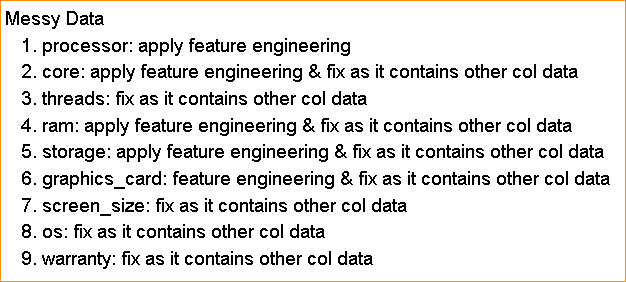

In [41]:
messy_df = pd.read_excel("smartprix_laptop_cleaned_2.xlsx")

In [42]:
messy_df['processor'].sample(25)

16         7th Gen AMD Ryzen 7 7435HS
493        5th Gen AMD Ryzen 5  5600H
415      12th Gen Intel Core i3 1215U
471    13th Gen Intel Core i7 13700HX
597      12th Gen Intel Core i7 1255U
467         7th Gen AMD Ryzen 5 7520U
747      13th Gen Intel Core i5 1335U
681     12th Gen Intel Core i5 12450H
366      13th Gen Intel Core i3 1315U
390     13th Gen Intel Core i7 13700H
545     12th Gen Intel Core i7 12700H
338     13th Gen Intel Core i9 13900H
497         7th Gen AMD Ryzen 5 7520U
387               Intel Celeron N4500
110      12th Gen Intel Core i5 1235U
853     11th Gen Intel Core i5 1155G7
21          7th Gen AMD Ryzen 5 7530U
595      12th Gen Intel Core i5 1235U
770           Intel Core Ultra 7 155U
404      13th Gen Intel Core i5 1335U
239         7th Gen AMD Ryzen 7 7730U
55       12th Gen Intel Core i5 1240P
841         5th Gen AMD Ryzen 5 5500U
80      13th Gen Intel Core i7 13700H
629     13th Gen Intel Core i5 13500H
Name: processor, dtype: object

In [43]:
# extract gen, extract brand, extract i5-i7-i9, extract H-U-HX

In [44]:
messy_df['processor_gen'] = messy_df['processor'].str.split(" ").str[0].str.replace("th","")

In [45]:
messy_df['processor'].value_counts()

12th Gen Intel Core i3 1215U                54
12th Gen Intel Core i5 12450H               48
12th Gen Intel Core i5 1235U                48
Intel Core Ultra 7 Series 1 155H            43
13th Gen Intel Core i5 1335U                32
13th Gen Intel Core i5 13420H               27
Intel Core Ultra 5 Series 1 125H            25
13th Gen Intel Core i7 13620H               21
Intel Core Ultra 9 Series 1 185H            20
14th Gen Intel Core i9 14900HX              20
12th Gen Intel Core i7 1255U                19
12th Gen Intel Core i5 12500H               16
7th Gen AMD Ryzen 3 7320U                   15
13th Gen Intel Core i3 1315U                15
7th Gen AMD Ryzen 5 7535HS                  15
12th Gen Intel Core i7 12650H               14
13th Gen Intel Core i7 1355U                14
13th Gen Intel Core i5 13500H               13
13th Gen Intel Core i7 1360P                13
7th Gen AMD Ryzen 7 7840HS                  13
14th Gen Intel Core i7 14700HX              12
Intel Celeron

In [46]:
# Function to classify processor brands
def classify_processor(processor_name):
    if 'Intel' in processor_name:
        return 'Intel'
    elif 'AMD' in processor_name:
        return 'AMD'
    elif 'Qualcomm' in processor_name:
        return 'Qualcomm'
    else:
        return 'Other'

In [47]:
messy_df['processor_brand'] = messy_df['processor'].apply(classify_processor)

In [48]:
# Extract only alphabetical characters without using regular expressions
def extract_alpha(s):
    return ''.join(char for char in s if char.isalpha())

In [49]:
messy_df['processor_performance'] = messy_df['processor'].str.split(" ").str[-1].apply(extract_alpha)

In [50]:
messy_df['core'].sample(5)

743                      Dual Core
432            Octa Core (4P + 4E)
436                       12 Cores
805     16 Cores (6P + 8E + 2LP-E)
740            24 Cores (8P + 16E)
Name: core, dtype: object

In [51]:
# Mapping dictionary for terms to numbers
core_mapping = {
    'Octa': 8,
    'Hexa': 6,
    'Quad': 4,
    'Dual': 2
}

# Function to replace terms with numbers
def replace_core_terms(core_str):
    for term, number in core_mapping.items():
        if term in core_str:
            return str(number)
    return core_str

In [52]:
messy_df['core'] = messy_df['core'].apply(replace_core_terms)

In [53]:
messy_df['core'] = messy_df['core'].str.split("Cores").str[0]

In [54]:
messy_df['threads'] = messy_df['threads'].str.replace("Threads","")

In [55]:
messy_df['ram_capacity'] = messy_df['ram'].str.split(" ").str[1]
messy_df['ram_type'] = messy_df['ram'].str.split(" ").str[2]

In [56]:
messy_df['storage_capacity'] = messy_df['storage'].str.split(" ").str[1]
messy_df['storage_type'] = messy_df['storage'].str.split(" ").str[2]

In [57]:
messy_df['graphics_card'].value_counts()

 Intel Iris Xe Graphics                      68
 Intel Integrated UHD                        59
 4\u2009GB NVIDIA GeForce RTX 2050           55
 Intel Integrated Iris Xe                    52
 8\u2009GB NVIDIA GeForce RTX 4060           52
 Intel UHD Graphics                          48
 6\u2009GB NVIDIA GeForce RTX 3050           44
 Intel Arc Graphics                          44
 6\u2009GB NVIDIA GeForce RTX 4050           43
 4\u2009GB NVIDIA GeForce RTX 3050           41
 AMD Radeon AMD                              33
 AMD Radeon Graphics                         31
 8\u2009GB NVIDIA GeForce RTX 4070           28
 Intel Integrated                            24
 Intel Graphics                              20
 Intel Integrated UHD Graphics               15
 Integrated Intel UHD Graphics               13
 12\u2009GB NVIDIA GeForce RTX 4080           9
 Intel Iris Xe                                9
 AMD Radeon                                   9
 Intel Integrated Integrated            

In [58]:
# Define categories and mapping
def categorize_graphics(graphics_str):
    if 'NVIDIA' in graphics_str:
        return 'NVIDIA'
    elif 'Intel' in graphics_str:
        return 'Intel'
    elif 'AMD' in graphics_str:
        return 'AMD'
    else:
        return 'Other'

In [59]:
messy_df['graphics_card_brand'] = messy_df['graphics_card'].apply(categorize_graphics)

In [60]:
messy_df['warranty'].value_counts()

 1 Year Warranty      698
 Windows 11 OS         86
 2 Year Warranty       83
 Backlit Keyboard      10
 Chrome OS OS           5
 3 Year Warranty        5
 Chrome OS              3
 Windows 10 OS          2
 1 USB 3.0 Ports        2
 1 Months Warranty      1
Name: warranty, dtype: int64

In [62]:
messy_df.to_excel("smartprix_laptop_cleaned_3.xlsx", index=False)

In [80]:
dirty_data = pd.read_excel("smartprix_laptop_cleaned_3.xlsx")

In [81]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   productName            895 non-null    object 
 1   price                  895 non-null    object 
 2   rating                 895 non-null    float64
 3   specScore              895 non-null    int64  
 4   features               895 non-null    object 
 5   processor              895 non-null    object 
 6   core                   895 non-null    object 
 7   threads                895 non-null    object 
 8   ram                    895 non-null    object 
 9   storage                895 non-null    object 
 10  graphics_card          895 non-null    object 
 11  screen_size            895 non-null    object 
 12  pixels                 895 non-null    object 
 13  os                     895 non-null    object 
 14  warranty               895 non-null    object 
 15  brand 

In [82]:
dirty_data['price'] = dirty_data['price'].str.replace("₹","").str.replace(",","").astype(float)

In [83]:
dirty_data['core'] = dirty_data['core'].str.strip()

In [84]:
dirty_data['screen_size'] = dirty_data['screen_size'].str.replace("inches","")

In [85]:
dirty_data['pixels'] = dirty_data['pixels'].str.replace("pixels","")

In [86]:
dirty_data['os'] = dirty_data['os'].str.replace("OS","")

In [87]:
dirty_data['warranty'] = dirty_data['warranty'].str.replace("Year Warranty","")

In [88]:
dirty_data['processor_gen'] = dirty_data['processor_gen'].str.strip()

In [89]:
dirty_data['processor_brand'] = dirty_data['processor_brand'].str.strip()

In [90]:
dirty_data['processor_performance'] = dirty_data['processor_performance'].str.strip()

In [91]:
dirty_data['ram_capacity'] = dirty_data['ram_capacity'].str.replace("GB","")

In [92]:
dirty_data['storage_capacity']

0           512GB
1             1TB
2           512GB
3           512GB
4           512GB
5           512GB
6           512GB
7           512GB
8           512GB
9           512GB
10          512GB
11            1TB
12          512GB
13          512GB
14          512GB
15          512GB
16          512GB
17            1TB
18          512GB
19          512GB
20          512GB
21          512GB
22          512GB
23          512GB
24          512GB
25            1TB
26       16inches
27            1TB
28          512GB
29          512GB
30          512GB
31          512GB
32            1TB
33          512GB
34          512GB
35          512GB
36          512GB
37          512GB
38          512GB
39          512GB
40          512GB
41          512GB
42          512GB
43           64GB
44          512GB
45            1TB
46          512GB
47          512GB
48          512GB
49          512GB
50          512GB
51          512GB
52          512GB
53          512GB
54          512GB
55        

In [93]:
# Function to split the storage string using simple slicing
def split_storage(storage_str):
    # Find where the digits end
    for i in range(len(storage_str)):
        if storage_str[i].isalpha():
            return storage_str[:i], storage_str[i:]
    return storage_str, ''  # Handle cases where there's no letter

In [94]:
# Apply the function and create new columns
dirty_data[['storage_size', 'storage_unit']] = dirty_data['storage_capacity'].apply(lambda x: pd.Series(split_storage(x)))

In [ ]:
dirty_data.to_excel("smartprix_laptop_cleaned_4.xlsx", index=False)

## Round 2 Data Cleaning

In [108]:
df.isnull().sum()df

productName       0
price             0
rating            0
specScore         1
features          1
processor         1
core              1
threads           1
ram               1
storage           1
graphics_card     1
screen_size       3
pixels            3
os                3
warranty         51
brand             0
dtype: int64

In [109]:
df.shape

(946, 16)

In [110]:
#performed cleaning on excel